In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#rule 3

def rule3(dA,dB):
    dQ = np.sqrt(dA**2+dB**2)
    return dQ

In [11]:
#rule 4

def rule4(q,m,dA,A,n,dB,B):
    dQ = q*np.sqrt((m*dA/A)**2+(n*dB/B)**2)
    return dQ

In [12]:
dV = 0.01 #volts
print ("uncertainty in V",dV,"volts")

d_deltaV = rule3(dV,dV)
print ("uncertainty in delta V",d_deltaV,"volts")

dr = 0.0005 #meters
print ("uncertainty in r",dr,"meters")

d_deltar = rule3(dr,dr)
print ("uncertainty in delta r",d_deltar,"meters")

dr_mid = d_deltar/2
print ("uncertainty in r mid",dr_mid,"meters")

uncertainty in V 0.01 volts
uncertainty in delta V 0.01414213562373095 volts
uncertainty in r 0.0005 meters
uncertainty in delta r 0.0007071067811865475 meters
uncertainty in r mid 0.00035355339059327376 meters


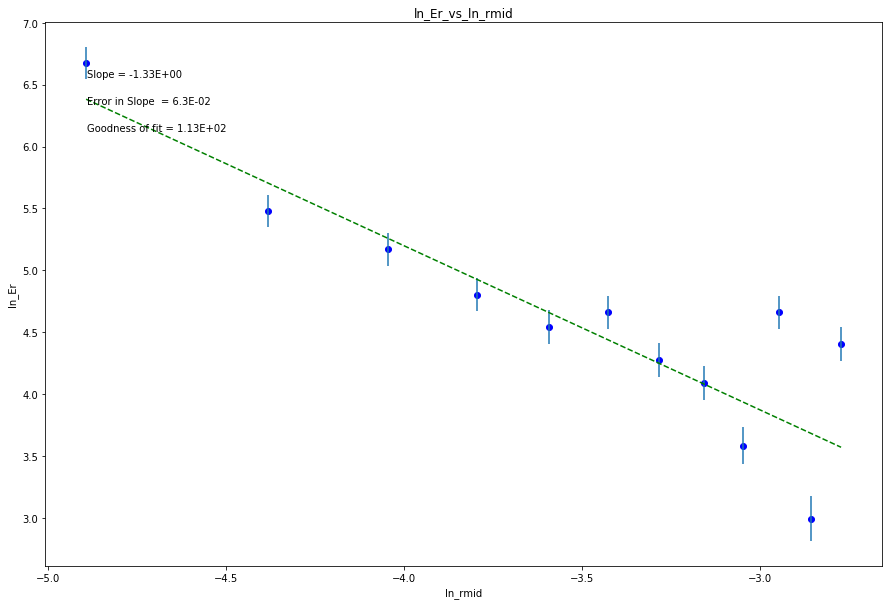

In [13]:
ln_rmid = np.array ([-4.8926,-4.3820,-4.0456,-3.7942,-3.5936,-3.4265,-3.2834,-3.1582,-3.0470,-2.9469,-2.8560,-2.7726])
ln_Er = np.array ([6.6720,5.4806,5.1705,4.8040,4.5433,4.6634,4.2767,4.0943,3.5835,4.6634,2.9957,4.4067])
err_ln_Er = np.array ([0.1311,0.1315,0.1318,0.1327,0.1338,0.1332,0.1357,0.1377,0.1488,0.1332,0.1812,0.1347])

x = ln_rmid
y = ln_Er
dy = err_ln_Er

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

fit = b+m*x

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2))
db = np.sqrt(1/D*sum(x**2/dy**2))

def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')

plt.xlabel('ln_rmid')
plt.ylabel('ln_Er')
plt.title('ln_Er_vs_ln_rmid')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope  = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
